In [ ]:
!pip install giniclust3
!pip install scanpy
!pip install anndata
!pip install leidenalg
!pip install desc
!pip install matplotlib==3.1.3
# !pip install matplotlib

  Created wheel for giniclust3: filename=giniclust3-1.0.1-py3-none-any.whl size=7278 sha256=d72bfc3d8af398f0be34cf4a51c967665dc2b0a77dc617f3eb651ce571c52302
  Stored in directory: /root/.cache/pip/wheels/38/03/95/73670883bf24d6d3980251f570742fc7f882de7f056d33a765
Successfully built giniclust3
     |████████████████████████████████| 2.0 MB 5.1 MB/s 
     |████████████████████████████████| 96 kB 4.5 MB/s 
     |████████████████████████████████| 11.2 MB 40.1 MB/s 
     |████████████████████████████████| 88 kB 6.1 MB/s 
     |████████████████████████████████| 930 kB 50.0 MB/s 
     |████████████████████████████████| 1.1 MB 55.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c0be37c374c35eabe12bc15766155777ac4deb64b706d74a1f7a21cd04a434e4
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename

     |████████████████████████████████| 1.3 MB 5.0 MB/s 
     |████████████████████████████████| 3.1 MB 38.0 MB/s 
     |████████████████████████████████| 5.1 MB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 48.8 MB/s 
     |████████████████████████████████| 462 kB 50.2 MB/s 
     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Statistical_ML/ML_Final_Project/GiniClust/DESC_model/SAE.py .
!cp /content/drive/MyDrive/Statistical_ML/ML_Final_Project/GiniClust/DESC_model/network.py .

In [ ]:
import scanpy as sc
import numpy as np
import giniclust3 as gc
import anndata
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import desc
import pandas as pd

from __future__ import division
from __future__ import print_function
import os,math
os.environ['PYTHONHASHSEED'] = '0'
havedisplay = "DISPLAY" in os.environ
from time import time as get_time
import random
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
import multiprocessing
from anndata import AnnData
import scanpy as sc
from scipy.sparse import issparse
try:
    from .network import *
except:
    from network import *

from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn import metrics
from scipy.io import mmread

import h5py

%matplotlib inline

# Load dataset

In [ ]:
# 6k PBMC dataset
# barcodes = pd.read_csv('/content/drive/MyDrive/ML_Final_Project/GiniClust/dataset/PBMC_6k/barcodes.tsv',sep='\t', header=None)
# genes = pd.read_csv('/content/drive/MyDrive/ML_Final_Project/GiniClust/dataset/PBMC_6k/genes.tsv',sep='\t', header=None)
# expr_data = mmread('/content/drive/MyDrive/ML_Final_Project/GiniClust/dataset/PBMC_6k/matrix.mtx')

# # adatasim.var['gene_list'] = genes
# adatasim = sc.read_10x_mtx(
#     '/content/drive/MyDrive/ML_Final_Project/GiniClust/dataset/PBMC_6k',  # the directory with the `.mtx` file
#     var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
#     cache=True) 

In [ ]:
# adatasim.X = adatasim.X.todense()

NameError: ignored

In [ ]:
# # Load bladder dataset (from scAIDE)
# with h5py.File("/content/drive/MyDrive/Statistical_ML/ML_Final_Project/GiniClust/dataset/Shekhar_mouse_retina.h5", "r") as retina:
#     adataRetina = sc.AnnData(X = np.array(retina["X"]))
#     adataRetina.obs['true'] = np.array(retina["Y"])

In [ ]:
# # Load Dataset (Simulated Dataset using Splatter)
# with h5py.File("/content/drive/MyDrive/Statistical_ML/ML_Final_Project/GiniClust/dataset/Simulate_Splatter/proportion/sim_0.1.h5ad", "r") as sim:
#     adatasim = sc.AnnData(X=np.array(sim['X']))
#     datasim = adatasim.X
#     obs = {'Batch': np.array(sim['obs']['Batch']),
#         'ExpLibSize': np.array(sim['obs']['ExpLibSize']),
#         'Group': np.array(sim['obs']['Group'])}
#     var = {'BaseGeneMean': np.array(sim['var']['BaseGeneMean']),
#         'DEFacGroup1': np.array(sim['var']['DEFacGroup1']),
#         'DEFacGroup2': np.array(sim['var']['DEFacGroup2']),
#         'GeneMean': np.array(sim['var']['GeneMean']),
#         'OutlierFactor': np.array(sim['var']['OutlierFactor'])}

#     adatasim.obs = pd.DataFrame(obs)
#     adatasim.var = pd.DataFrame(var)

In [ ]:
# The data consists in 20K Neurons, downsampled from 1.3 Million Brain Cells from E18 Mice
adatasim = sc.read_10x_h5('/content/drive/MyDrive/Statistical_ML/ML_Final_Project/GiniClust/1M_neurons_neuron20k.h5')
adatasim.X = adatasim.X.todense()

In [ ]:
# Make a copy of the raw data
adataSimulate = adatasim.copy()

In [ ]:
adataSimulate

AnnData object with n_obs × n_vars = 20000 × 27998
    var: 'gene_ids'

# Preprocessing

In [ ]:
# Preprocessing and store adataSimulate for calculating GiniIndex and FanoFactor
sc.pp.filter_cells(adataSimulate, min_genes=200) # 2000
sc.pp.filter_genes(adataSimulate, min_cells=3) # 3
sc.pp.normalize_per_cell(adataSimulate, counts_per_cell_after=1e4)
print(adataSimulate)

AnnData object with n_obs × n_vars = 19793 × 17968
    obs: 'n_genes', 'n_counts'
    var: 'gene_ids', 'n_cells'


# Calculate FanoFactor and GiniIndex, and use DESC to do clustering

In [ ]:
# Calculate Fano factor
gc.fano.calFano(adataSimulate) 
adataFano = adataSimulate[:, adataSimulate.var['highly_variable']].copy()
sc.pp.scale(adataFano, zero_center=True, max_value=3)

# Calculate Gini index
gc.gini.calGini(adataSimulate, min_gini_value=0.3) 
adataGini = adataSimulate[:, adataSimulate.var['gini']].copy()
sc.pp.scale(adataGini, zero_center=True, max_value=3)
# adataGini=gc.gini.clusterGini(adataSimulate,neighbors=3)



Gene number is 17968
Cell number is 19793


In [ ]:
# adataFano = desc.train(adataFano, dims=[adataFano.shape[1], 32, 16], tol=0.005, n_neighbors=3,
#                    batch_size=256, louvain_resolution=[1.], do_umap=True)

In [ ]:
### Modify later
# if use_GPU:
#     try:
#         os.environ["CUDA_VISIBLE_DEVICES"] = str(GPU_id)
#     except:
#         os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# else:
#     os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
#     tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=tf.compat.v1.ConfigProto(intra_op_parallelism_threads=num_Cores, inter_op_parallelism_threads=num_Cores)))


In [ ]:
random.seed(4480)
np.random.seed(4480)
tf.random.set_seed(4480)

def getdims(x=(10000,200)):
    """
    This function will give the suggested nodes for each encoder layer
    return the dims for network
    """
    assert len(x)==2
    n_sample=x[0]
    if n_sample>20000:# may be need complex network
        dims=[x[-1],128,64,32]
    elif n_sample>10000:#10000
        dims=[x[-1],64,32,16]
    elif n_sample>5000: #5000
        dims=[x[-1],32,16] #16
    elif n_sample>2000:
        dims=[x[-1],128]
    elif n_sample>500:
        dims=[x[-1],64]
    else:
        dims=[x[-1],16]
    return dims

adatas = [adataFano, adataGini]
# louvain resolution (0 - 1.0), larger number indicating more clusters, vice versa
louvain = [0.8, 0.4] 
for n in range(2):
    parameters = {"louvain_resolution": louvain[n],
                  "alpha": 1.0,
                  "tol": 0.005,
                  "n_neighbors": 10,
                  "batch_size": 300,
                  "max_iter": 1000,
                  "pretrain_epoch": 200,
                  "drop_rate_SAE": 0.2,
                  "random_seed": 4480}
    # timer
    tic = get_time()

    # Create model
    desc = DescModel(dims=getdims(adatas[n].shape),
                     x=adatas[n].X, 
                     alpha=parameters['alpha'],
                     louvain_resolution=parameters['louvain_resolution'],
                     tol=parameters["tol"],
                     drop_rate_SAE=parameters['drop_rate_SAE'],
                     random_seed=parameters['random_seed'],
                     n_neighbors=parameters["n_neighbors"],
                     batch_size=parameters["batch_size"])
    
    desc.compile(optimizer=SGD(0.01, 0.9),loss='kld')

    Embeded_z, q_pred = desc.fit(maxiter=parameters["max_iter"])
    print("The desc has been trained successfully!!!!!!")

    print("The summary of desc model is:")
    desc.model.summary()
    
    print("The runtime of (resolution="+str(parameters["louvain_resolution"])+")is:",get_time()-tic)

    # Predict clusters
    y_pred = pd.Series(np.argmax(q_pred,axis=1), index=adatas[n].obs.index, dtype='category')
    y_pred.cat.categories = list(range(len(y_pred.unique())))
    adatas[n].obs['desc_'+str(parameters["louvain_resolution"])] = y_pred
    adatas[n].obsm['X_Embeded_z'+str(parameters["louvain_resolution"])] = Embeded_z
    adatas[n].uns['prob_matrix'+str(parameters["louvain_resolution"])] = q_pred

    # Do UMAP
    sc.pp.neighbors(adatas[n],n_neighbors=parameters["n_neighbors"], use_rep="X_Embeded_z"+str(parameters["louvain_resolution"])) 
    sc.tl.umap(adatas[n])
    adatas[n].obsm["X_umap"+str(parameters["louvain_resolution"])] = adatas[n].obsm["X_umap"].copy() 
    print('umap finished and added X_umap'+str(parameters["louvain_resolution"]),' into the umap coordinates (adata.obsm)\n')

    # Reset the DESC Model
    tf.keras.backend.clear_session()
    del desc

Create the directory:result_tmp to save result
use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1
Epoch 1/50
66/66 [==============================] - 2s 14ms/step - loss: 0.5369
Epoch 2/50
66/66 [==============================] - 1s 14ms/step - loss: 0.5069
Epoch 3/50
66/66 [==============================] - 1s 13ms/step - loss: 0.4866
Epoch 4/50
66/66 [==============================] - 1s 13ms/step - loss: 0.4746
Epoch 5/50
66/66 [==============================] - 1s 14ms/step - loss: 0.4648
Epoch 6/50
66/66 [==============================] - 1s 14ms/step - loss: 0.4564
Epoch 7/50
66/66 [==============================] - 1s 14ms/step - loss: 0.4486
Epoch 8/50
66/66 [==============================] - 1s 14ms/step - loss: 0.4416
Epoch 9/50
66/66 [==============================] - 1s 14ms/step - loss: 0.4357
Epoch 10/50
66/66 [==============================] - 1s 14ms/step - loss: 0.4310
Epoch 11/50
66/66 [===========================

# Make consensus matrix and do clustering

In [ ]:
# Functions for making consensus matrix
from sklearn.cluster import KMeans
def determinK(gini,fano):
    cellNum=0
    for g in gini.keys():
        cellNum=cellNum+len(gini[g])
    count=0
    rare=0
    for g in gini.keys():
        if (len(gini[g])/cellNum>0.01):
            continue
        rare=rare+1
        for f in fano.keys():
            overlap=len(np.intersect1d(gini[g],fano[f]))
            overlapG=overlap/len(gini[g])
            overlapF=overlap/len(fano[f])
            if (overlapG>=0.8 and overlapF>=0.8):
                count+=1
    k=rare+len(fano)-count
    return(k)

def clusterMtilde(GCconsensus,**kwargs):
    """
    Cluster consensus Mtilde matrix based on Gini and Fano cluster results.
    Params
    ------
    GCDict
        GCDict returned from generateMtilde
    k: int, optional 
        Number of K in KMeans clustering. Default value based on Gini and Fano
        cluster results.
    Returns
    -------
    Returns dictionary with KMeans cluster result. GCDict['finalCluster']
    """
    k_auto=determinK(GCconsensus['giniCellDict'],GCconsensus['fanoCellDict'])
    K=kwargs.get('k',k_auto)
    kmeans = KMeans(n_clusters=K,n_init=100).fit(GCconsensus['Mtilde'])
    finalClustIndex=kmeans.labels_
    GCconsensus['finalIndex']=np.array(finalClustIndex)

    ###project to each single cell###
    hashProject={}
    for i in range(len(GCconsensus['finalIndex'])):
        key=str(GCconsensus['giniIndex'][i])+"_"+str(GCconsensus['fanoIndex'][i])
        hashProject[key]=GCconsensus['finalIndex'][i]
    finalClust=[]
    for i in range(len(GCconsensus['overlap'])):
        key=str(GCconsensus['overlap'][i])+"_"+str(GCconsensus['fanoCluster'][i])
        finalClust.append(str(hashProject[key]))

    ######sort and remark clusters######
    remarkClust=[]
    hashFinalCount={}
    for i in range(len(finalClust)):
        hashFinalCount[finalClust[i]]=hashFinalCount.get(finalClust[i],0) + 1
    diCount=[]
    for i in hashFinalCount.keys():
        listCount=[]
        listCount.append(i)
        listCount.append(hashFinalCount[i])
        diCount.append(listCount)
    diCount.sort(key=lambda x:x[1],reverse=True)
    hashFinalProject={}
    for i in range(len(diCount)):
        hashFinalProject[diCount[i][0]]=str(i)
    finalSortedClust=[]
    for i in range(len(finalClust)):
        finalSortedClust.append(hashFinalProject[finalClust[i]])
    GCconsensus['finalCluster']=finalSortedClust

In [ ]:
adataGini

AnnData object with n_obs × n_vars = 19793 × 67
    obs: 'n_genes', 'n_counts', 'desc_0.4'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gini', 'mean', 'std'
    uns: 'log1p', 'hvg', 'prob_matrix0.4', 'neighbors', 'umap'
    obsm: 'X_Embeded_z0.4', 'X_umap', 'X_umap0.4'
    obsp: 'distances', 'connectivities'

In [ ]:
# Making consensus matrix and clustering
consensusCluster={}
# adataGini.obs['desc_{n}'], where n should be equal to the louvain resolution
consensusCluster['giniCluster'] = np.array(adataGini.obs['desc_0.4'].values.tolist())
consensusCluster['fanoCluster'] = np.array(adataFano.obs['desc_0.8'].values.tolist())
gc.consensus.generateMtilde(consensusCluster) # Generate consensus matrix
clusterMtilde(consensusCluster) # Cluster consensus matrix
# np.savetxt("final.txt", consensusCluster['finalCluster'], delimiter="\t", fmt='%s') 

In [ ]:
# Assign the cluster number clustered from consensus matrix to the 'final' objects of adataGini and adataFano
adataGini.obs['final'] = consensusCluster['finalCluster']
adataFano.obs['final'] = consensusCluster['finalCluster']
adataSimulate.obs['final'] = consensusCluster['finalCluster']

# UMAP

In [ ]:
# convert 'cluster_id' to category type
# adataSimulate.obs['Group'] = adataSimulate.obs['Group'].to_numpy().astype(str)

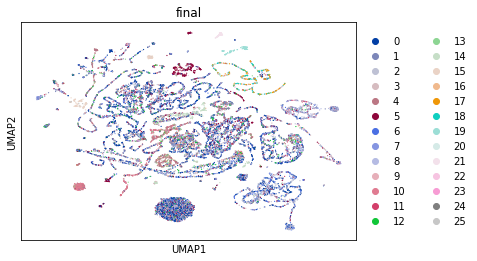

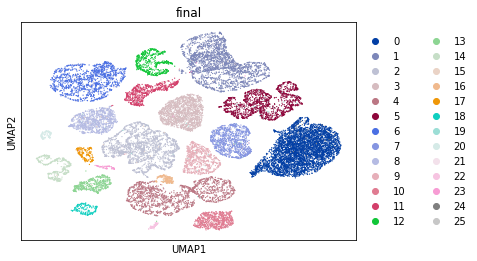

In [ ]:
### Gini - UMAP
# sc.pp.neighbors(adataGini)
sc.tl.umap(adataGini)
sc.pl.umap(adataGini, color='final')

### Fano - UMAP
# sc.pp.neighbors(adataFano)
sc.tl.umap(adataFano)
sc.pl.umap(adataFano, color='final')

         Falling back to preprocessing with `sc.pp.pca` and default params.


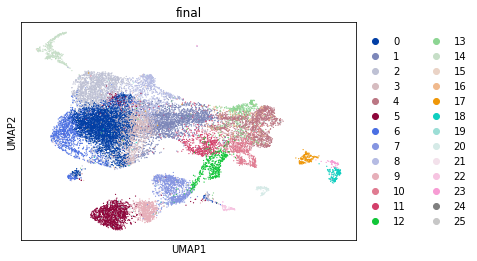

In [ ]:
# sc.pp.neighbors(adataSimulate)
sc.tl.umap(adataSimulate)
sc.pl.umap(adataSimulate, color='final')
# sc.pl.umap(adataSimulate, color='Group')

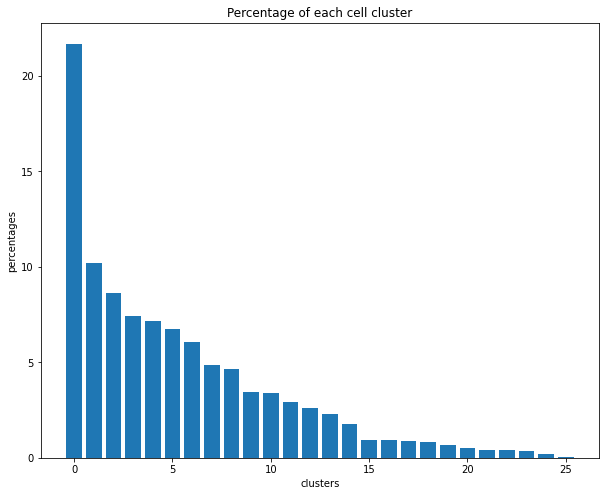

In [ ]:
# compute and visualize the percentage of each cluster
# clusters_true = adataSimulate.obs['Group'].to_numpy().astype(float).tolist()
# clusters_num_true = np.unique(clusters_true)
# percentages_true = []

clusters_pred = adataSimulate.obs['final'].to_numpy().astype(float).tolist()
clusters_num_pred = np.unique(clusters_pred)
percentages_pred = []
cluster_of_rare_cell =[]
# for n in clusters_num_true:
#     count = clusters_true.count(n)
#     percent = count / adataSimulate.shape[0] * 100
#     percentages_true.append(percent)

for n in clusters_num_pred:
    count = clusters_pred.count(n)
    percent = count / adataSimulate.shape[0] * 100
    percentages_pred.append(percent)
    if percent <= 2:
      cluster_of_rare_cell.append(str(n))

fig = plt.figure(figsize=(10, 8))
# axes = fig.add_subplot(1, 2, 1)
# axes.bar(clusters_num_true, percentages_true)
# axes.set_xlabel("clusters")
# axes.set_ylabel("percentages")
# axes.set_title("true")

axes = fig.add_subplot(1, 1, 1)
axes.bar(clusters_num_pred, percentages_pred)
axes.set_xlabel("clusters")
axes.set_ylabel("percentages")
axes.set_title("Percentage of each cell cluster")

plt.show()

In [ ]:
cluster_of_rare_cell

['14.0',
 '15.0',
 '16.0',
 '17.0',
 '18.0',
 '19.0',
 '20.0',
 '21.0',
 '22.0',
 '23.0',
 '24.0',
 '25.0']

## Finding marker genes

In [ ]:
adataSimulate.var_names_make_unique()

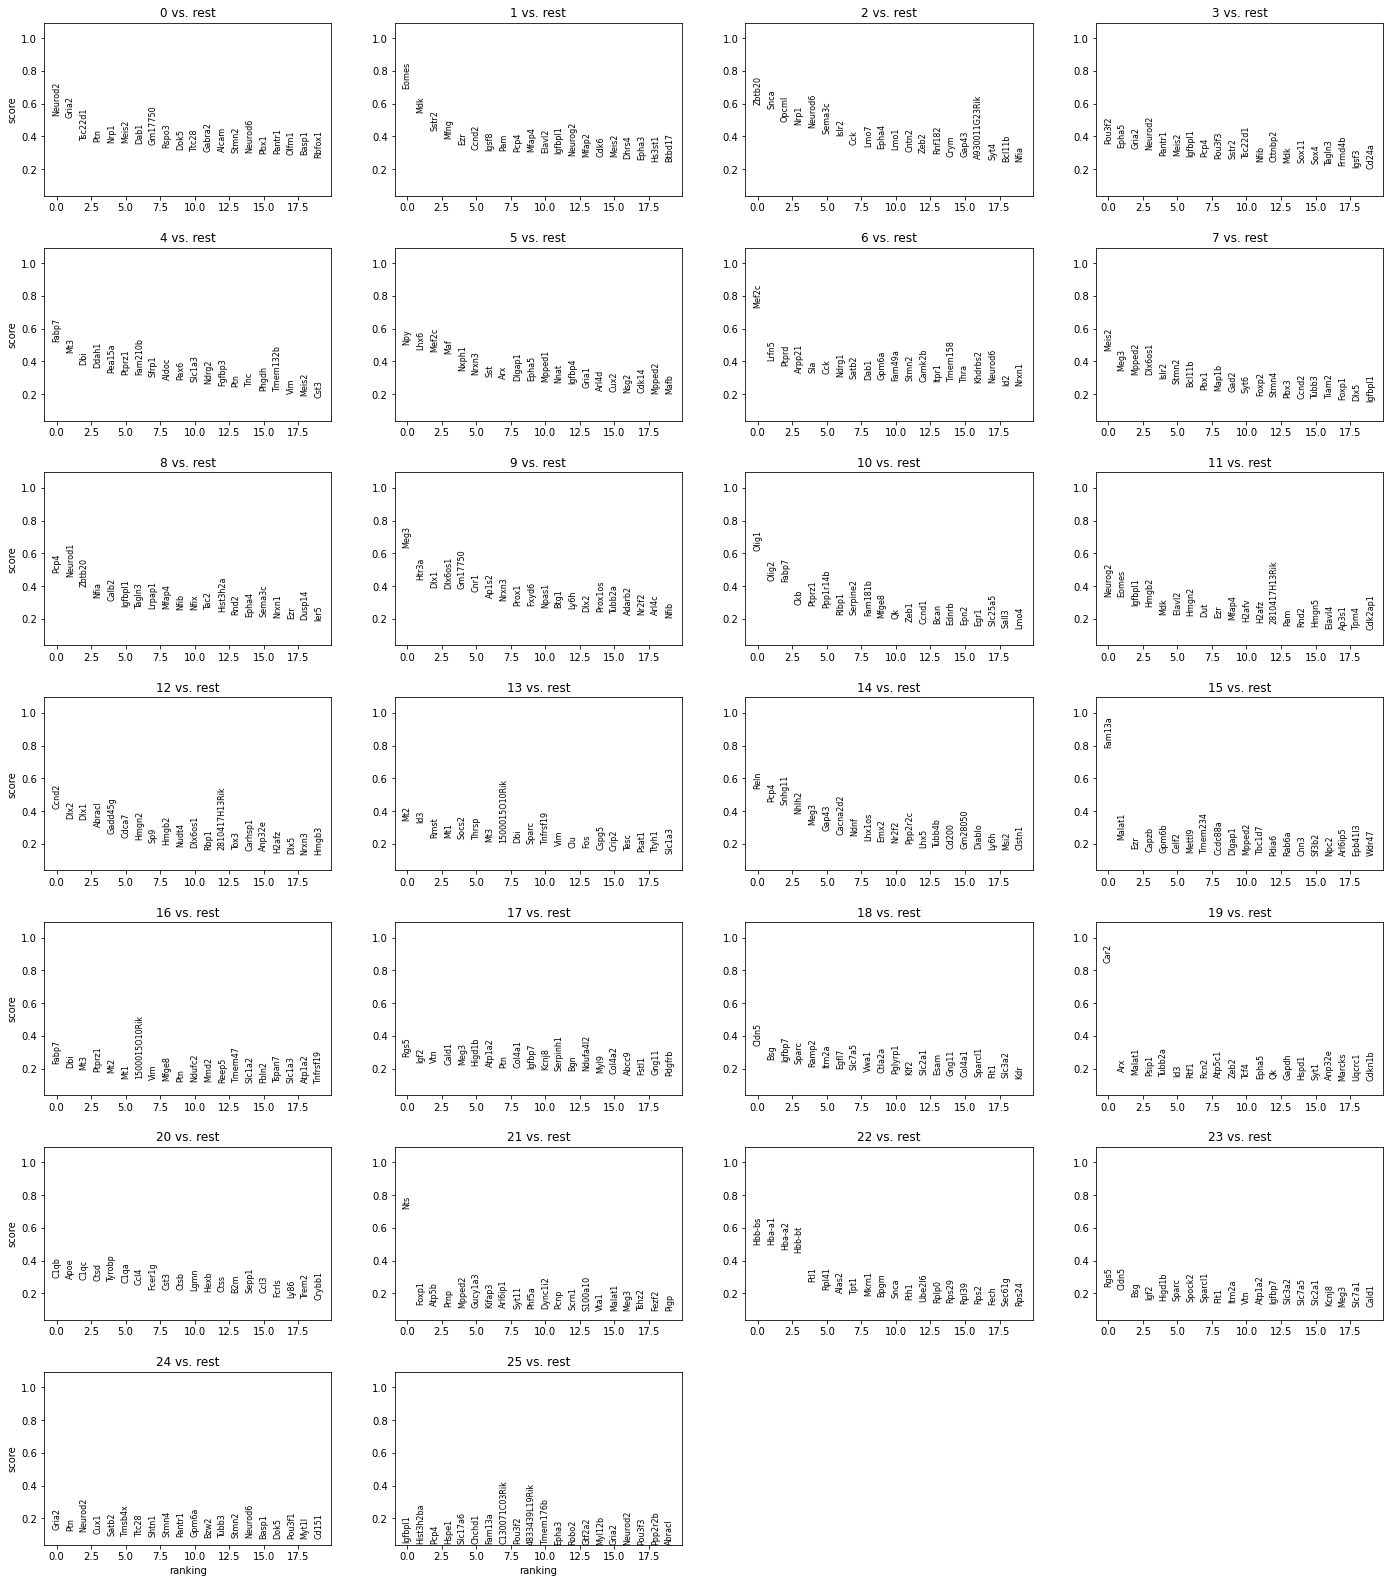

In [ ]:
# rank genes using logreg
sc.tl.rank_genes_groups(adataSimulate, 'final', method='logreg')
# to visualize the results
sc.pl.rank_genes_groups(adataSimulate)

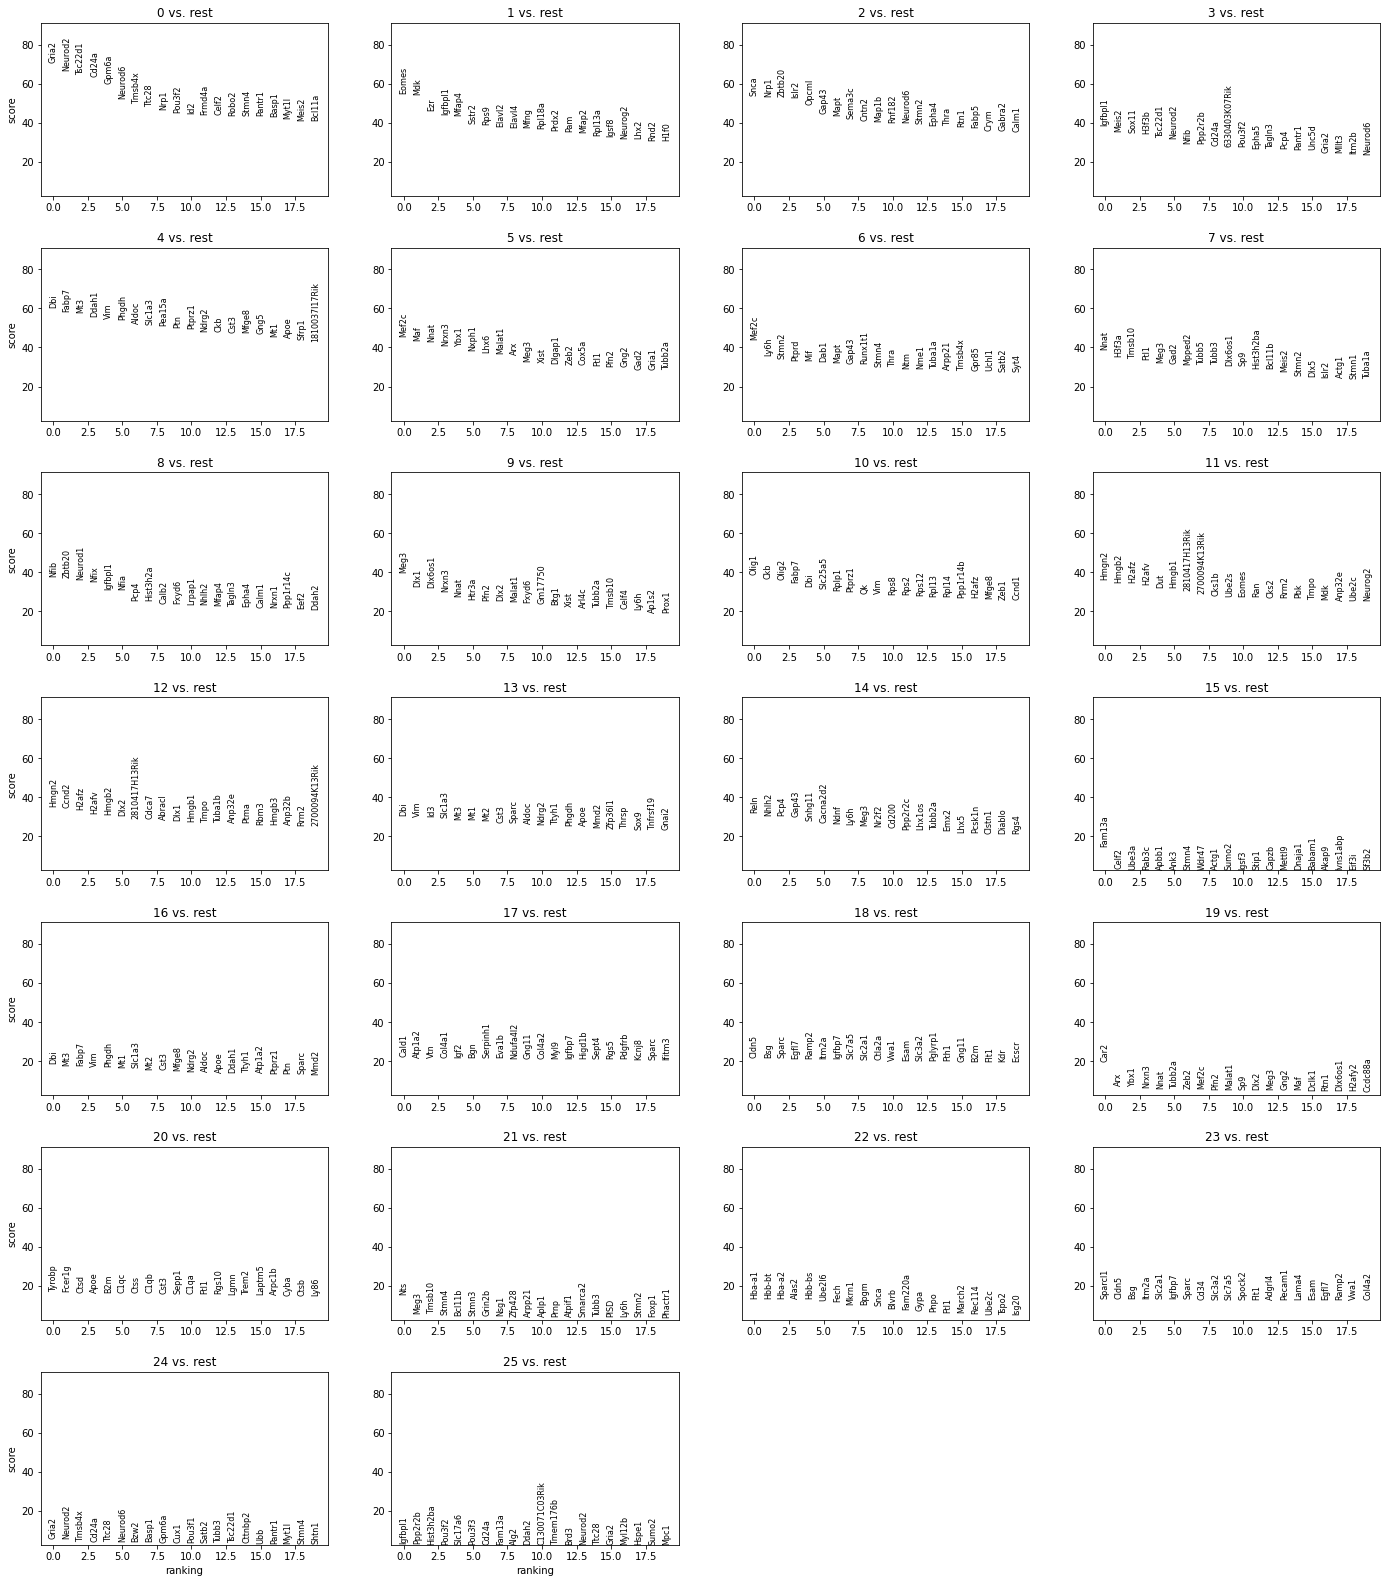

In [ ]:
# # rank genes using wilcoxon
sc.tl.rank_genes_groups(adataSimulate, 'final', method='wilcoxon')
# to visualize the results
sc.pl.rank_genes_groups(adataSimulate)

In [ ]:
# rank genes using t-test
# sc.tl.rank_genes_groups(adataSimulate, 'final', method='t-test')
# # to visualize the results
# sc.pl.rank_genes_groups(adataSimulate)

In [ ]:
adataSimulate

AnnData object with n_obs × n_vars = 19793 × 17968
    obs: 'n_genes', 'n_counts', 'final'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gini'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'final_colors', 'rank_genes_groups', 'dendrogram_final'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
pd.DataFrame(adataSimulate.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Neurod2,Eomes,Zbtb20,Pou3f2,Fabp7,Npy,Mef2c,Meis2,Pcp4,Meg3,...,Fabp7,Rgs5,Cldn5,Car2,C1qb,Nts,Hbb-bs,Rgs5,Gria2,Igfbpl1
1,Gria2,Mdk,Snca,Epha5,Mt3,Lhx6,Lrfn5,Meg3,Neurod1,Htr3a,...,Dbi,Igf2,Bsg,Arx,Apoe,Foxp1,Hba-a1,Cldn5,Ptn,Hist3h2ba
2,Tsc22d1,Sstr2,Opcml,Gria2,Dbi,Mef2c,Ptprd,Mpped2,Zbtb20,Dlx1,...,Mt3,Vtn,Igfbp7,Malat1,C1qc,Atp5b,Hba-a2,Bsg,Neurod2,Pcp4
3,Ptn,Mfng,Nrp1,Neurod2,Ddah1,Maf,Arpp21,Dlx6os1,Nfia,Dlx6os1,...,Ptprz1,Cald1,Sparc,Psip1,Ctsd,Prnp,Hbb-bt,Igf2,Cux1,Hspe1
4,Nrp1,Ezr,Neurod6,Pantr1,Pea15a,Nxph1,Sla,Islr2,Calb2,Gm17750,...,Mt2,Meg3,Ramp2,Tubb2a,Tyrobp,Mpped2,Ftl1,Higd1b,Satb2,Slc17a6


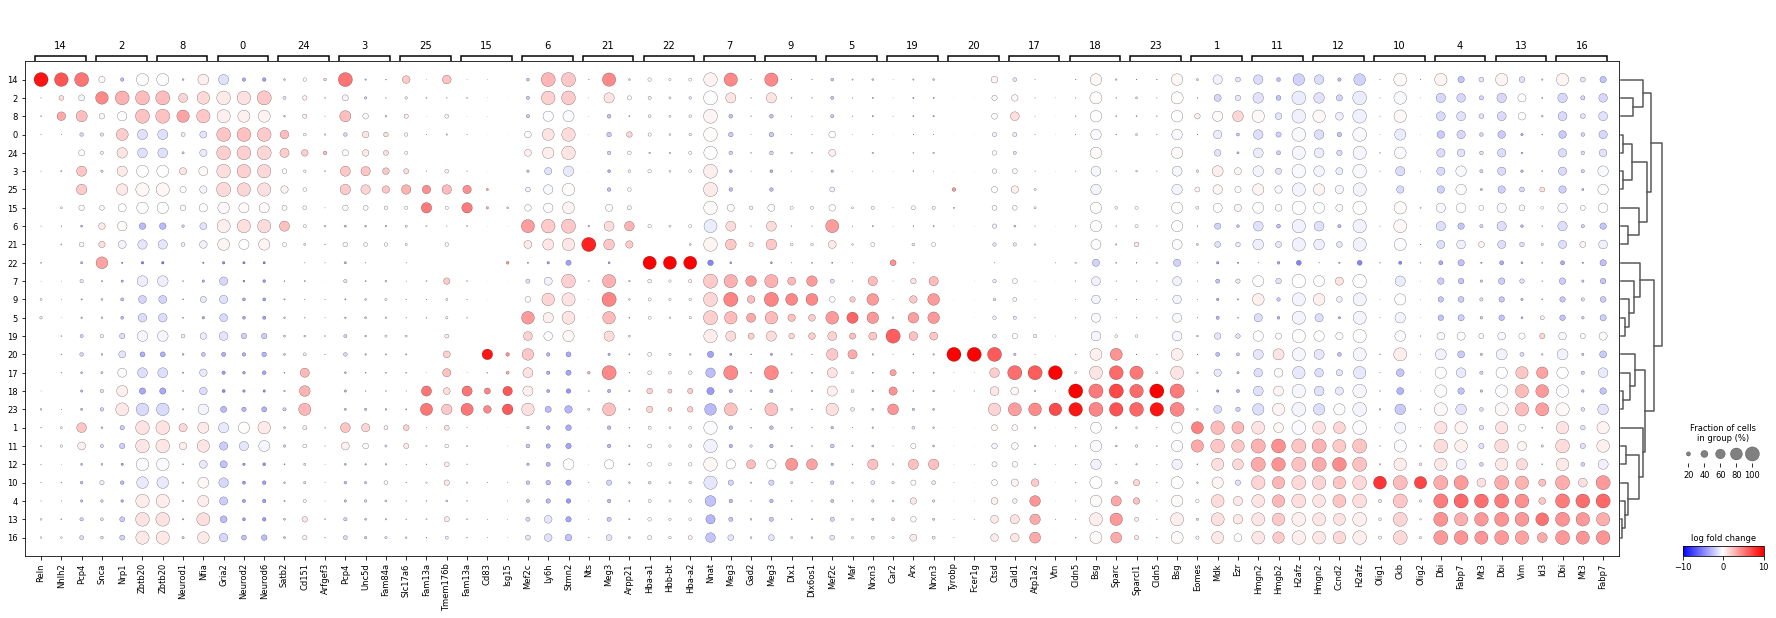

In [ ]:
sc.pl.rank_genes_groups_dotplot(
          adataSimulate,
          n_genes=3,
          values_to_plot="logfoldchanges",
          cmap='bwr',
          vmin=-10,
          vmax=10,
          min_logfoldchange=2,
          colorbar_title='log fold change')

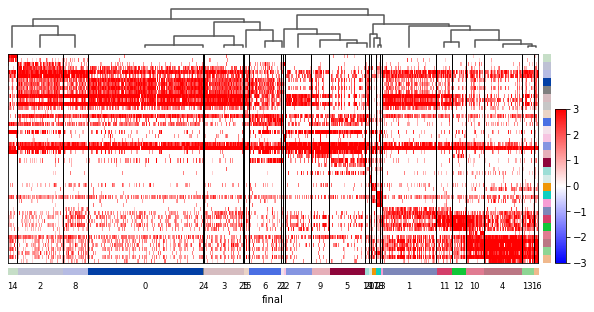

In [ ]:
sc.pl.rank_genes_groups_heatmap(adataSimulate, n_genes=2, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

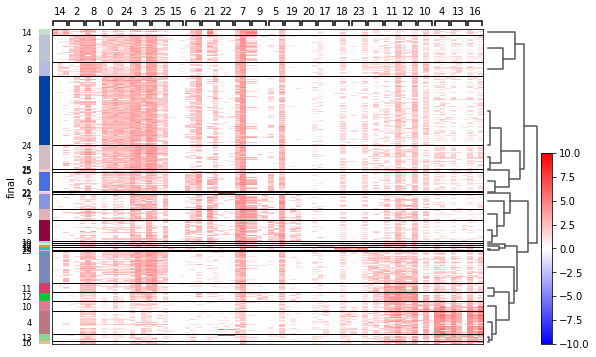

In [ ]:
sc.pl.rank_genes_groups_heatmap(adataSimulate,
          n_genes=3,
          values_to_plot="logfoldchanges",
          cmap='bwr',
          vmin=-10,
          vmax=10,
          min_logfoldchange=1)

categories: 0, 1, 2, etc.
var_group_labels: 14, 15, 16, etc.


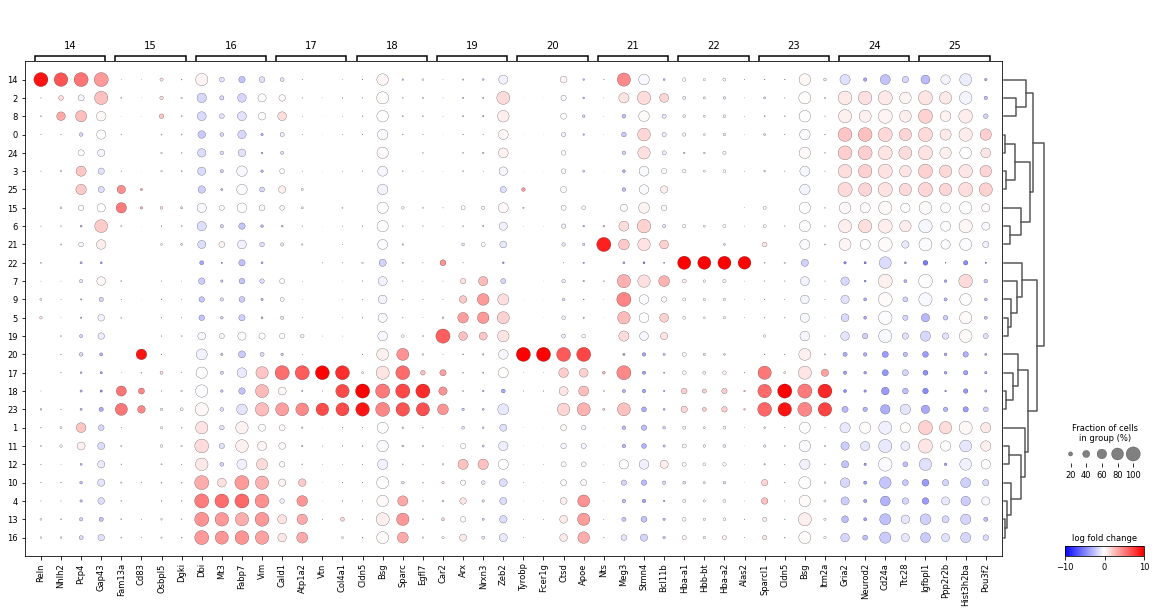

In [ ]:
sc.pl.rank_genes_groups_dotplot(adataSimulate, n_genes=4, values_to_plot='logfoldchanges', min_logfoldchange=1, vmax=10, vmin=-10, cmap='bwr', groups=['14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24','25'])